In [8]:
%load_ext autoreload
%autoreload 2

from imports import *
from utils import *
from models import *
from data import *
from ginr_experiment import *
from ginr_configs import CONFIGS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
bunny_3_fourier = GINR_Experiment("bunny_3_fourier", CONFIGS["bunny_3_fourier"])
bunny_3_fourier.plot()

In [ ]:
bunny_5_fourier = GINR_Experiment("bunny_5_fourier", CONFIGS["bunny_5_fourier"])
bunny_5_fourier.plot()

<Figure size 640x480 with 0 Axes>

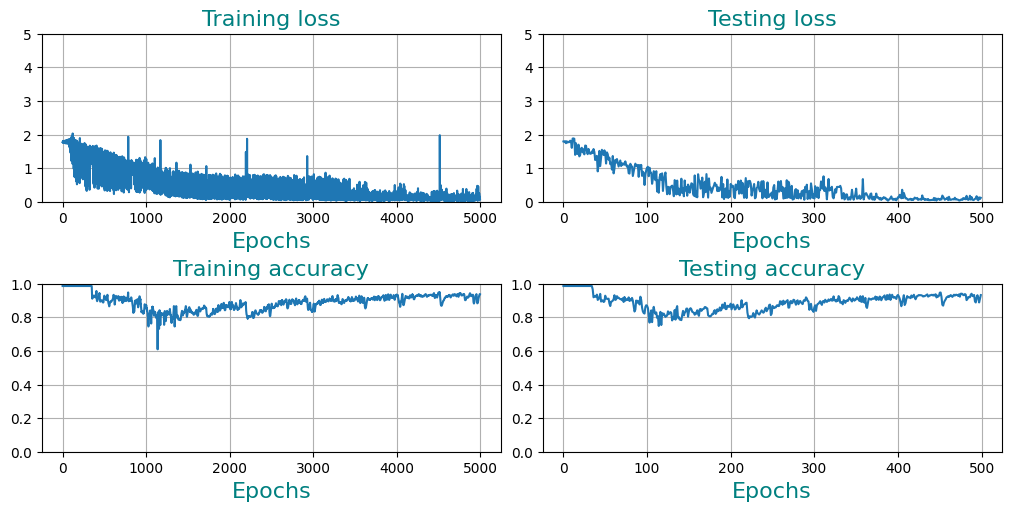

Finished training

Saving predictions

Finished



In [25]:
bunny_10_fourier = GINR_Experiment("bunny_10_fourier", CONFIGS["bunny_10_fourier"])
bunny_10_fourier.train(num_epochs=5000, show_plot=True)

In [17]:
train_set, _ = bunny_10_fourier.train_loader.dataset.get_all_points(0)
test_set, _ = bunny_10_fourier.test_loader.dataset.get_all_points(0)
model = bunny_10_fourier.model

train_set = train_set.cuda()
test_set = test_set.cuda()

In [20]:
#model(train_set) + model(-train_set)
model(train_set.abs())

tensor([[-1.4468,  0.2479, -1.6587, -1.0598,  0.5425,  0.3379],
        [-0.4033,  0.0791, -0.5000, -0.2706,  0.1324,  0.1162],
        [-1.2964,  0.2227, -1.4918, -0.9467,  0.4843,  0.3064],
        ...,
        [ 0.0629, -0.0301,  0.0117,  0.1143, -0.1469, -0.0385],
        [-0.3221,  0.0598, -0.4127, -0.2062,  0.0875,  0.0925],
        [-1.6247,  0.2767, -1.8570, -1.1982,  0.6197,  0.3802]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [21]:
#model(test_set) + model(-test_set)
model(test_set.abs())

tensor([[-1.4468,  0.2479, -1.6587, -1.0598,  0.5425,  0.3379],
        [-0.4033,  0.0791, -0.5000, -0.2706,  0.1324,  0.1162],
        [-1.2964,  0.2227, -1.4918, -0.9467,  0.4843,  0.3064],
        ...,
        [ 0.0629, -0.0301,  0.0117,  0.1143, -0.1469, -0.0385],
        [-0.3221,  0.0598, -0.4127, -0.2062,  0.0875,  0.0925],
        [-1.6247,  0.2767, -1.8570, -1.1982,  0.6197,  0.3802]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
bunny_50_fourier = GINR_Experiment("bunny_50_fourier", CONFIGS["bunny_50_fourier"])
bunny_50_fourier.plot()

In [ ]:
bunny_100_fourier = GINR_Experiment("bunny_100_fourier", CONFIGS["bunny_100_fourier"])
bunny_100_fourier.plot()